# 04. 잠재변수가 없는 구조방정식 모형
- 잠재변수는 고려하지 않고, 외생관찰변수와 내생관찰변수들 간의 구조적 관계만을 분석 $\rightarrow$ **경로분석 (Path Analysis)**

<br>

## 04.01. 연구모형의 구축과 해석

<br>

### 1. 모형에 대한 적합도 평가
- **카이제곱 통계량, GFI, RMSEA 등 적합도 통계량들을 활용하여 연구자가 설정한 모형의 전반적 적합도를 평가**
- 연구모형이 데이터(실제)에 잘 적용되는지를 평가 하는 것
- 모형의 전반적 적합도가 좋은 것으로 평가된다면, 이 모형을 통해 얻어진 데이터 분석의 결과를 해석할 수 있으며,

    **적합도가 좋지 않은 것으로 평가된다면 연구모형을 다시 설정하거나 수정**
    
<br>

### 2. 모형 수정
- 모형 수정의 2가지 방향

1. **모형에 모수를 추가하여 더 복잡한 형태의 모형을 생성**
- **모형의 적합도가 좋지 않은 통상적인 이유는 모형이 너무 단순하여 데이터의 구조를 제대로 나타내지 못하기 때문**
    - 이런 경우 모형에 추가적인 경로계수 또는 공분산을 도입하여 모형에 대한 제약을 완화
    - 이때 **수정지수(modification index)**를 이용하면, 어떤 모수를 추가해야 할지에 대한 정보를 얻음
    
2. **불필요한 모수를 삭제하여 더 간단한 형태의 모형을 생성**
- 통계적 모형 구축의 목적이 데이터에 내재되어 있는 복잡한 데이터의 구조를 단순화하여 설명하는 것에 있다고 할 때, 모수의 절약이 시도되지 않은 모형은 **간명성(parsimony)**의 측면에서 모형으로서의 가치가 떨어진다고 할 수 있음
    - 즉, 연구자는 간명한 모형에 의해서 가급적으로 데이터의 구조를 설명할 필요가 있다
    - 이때, 모수 추정치들에 대한 통계적 가설검정의 결과를 이용
    
<br>

### 3. 모수 추정치들에 대한 검정 및 해석

- 개별 모수 (경로계수 및 공분산)들의 추정치에 대하여 통계적 유의성을 평가하고, 각 추정치들의 부호와 크기를 고려하여 그 의미를 해석
- 직접(direct), 간접 (indirect), 총 (total) 효과 등에 대한 평가와 해석을 수행

<br>

#### 위의 모형 구축 절차는 대부분 한 번에 끝나지 않으며, 분석가는 좋은 적합도와 간명성이라는 목표를 달성하기 위하여 여러 번 모형을 수정하고 평가할 필요가 있게 된다

<br>

## 04.02. 초기모형

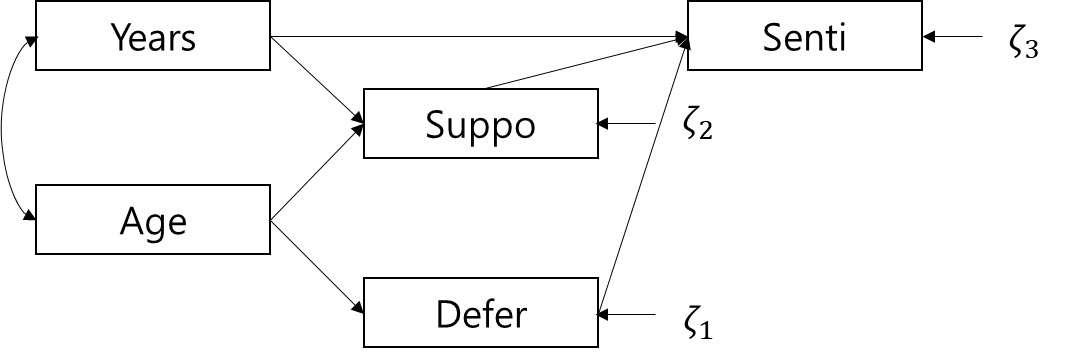

**외생 관찰변수 (Exogenous Observed Variable)** : Years, Age
- **다른 변수의 변화에 원인이나 동기의 역할을 하는 변수** 
- **외생변수의 변이는 모형 외부에 있는 다른 원인**

<br>

**내생 관찰변수 (Endogenous Observed Variable)** : Defer, Suppo, Senti
- **설명변수들 (외생변수, 다른 내생변수)에 의해여 영향을 받는 변수**
- **내생변수의 변이는 모형을 통해 적극적으로 설명하려는 부분**

$$
\begin{cases}
Defer\;=\;\rho_{12}Age + \;\zeta_1\\
Suppo\;=\;\rho_{21}Years + \rho_{22}Age + \;\zeta_2\\
Senti\;=\;\rho_{31}Years + \beta_{31}Defer + \beta_{32}Suppo + \zeta_3\\
\end{cases}$$

<br>

**오차변수 (Error Variable)** : $\zeta_1$, $\zeta_2$, $\zeta_3$
- **모형에 포함된 인과관계로는 설명불가**
- 내생변수의 변이를 발생시키는 원인

In [2]:
library(lavaan)
library(sem)
library(semPlot)
library(semptools)
library(psych)
library(tidyverse)

In [4]:
library(tidymodels)

In [5]:
detach("package:sem",unload=TRUE)

Warning message:
"'sem' namespace cannot be unloaded:
  namespace 'sem' is imported by 'semPlot' so cannot be unloaded"


In [6]:
Union <- read.csv(paste0(getwd(), "/Data/Union.csv"), header = TRUE)

In [7]:
Union.A <- '
    # regression
    Defer ~ Age
    Suppo ~ Years + Age
    Senti ~ Years + Defer + Suppo
'

In [8]:
Union.A.fit <- sem(Union.A, data = Union, fixed.x = FALSE)
summary(Union.A.fit, fit.measures=TRUE, # 적합도 통계량 출력
        rsquare=TRUE, standardized=TRUE) %>% print

lavaan 0.6.16 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12

  Number of observations                           173

Model Test User Model:
                                                      
  Test statistic                                24.505
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               164.810
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.862
  Tucker-Lewis Index (TLI)                       0.586

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2306.811
  Loglikelihood unrestricted model (H1)      -2294

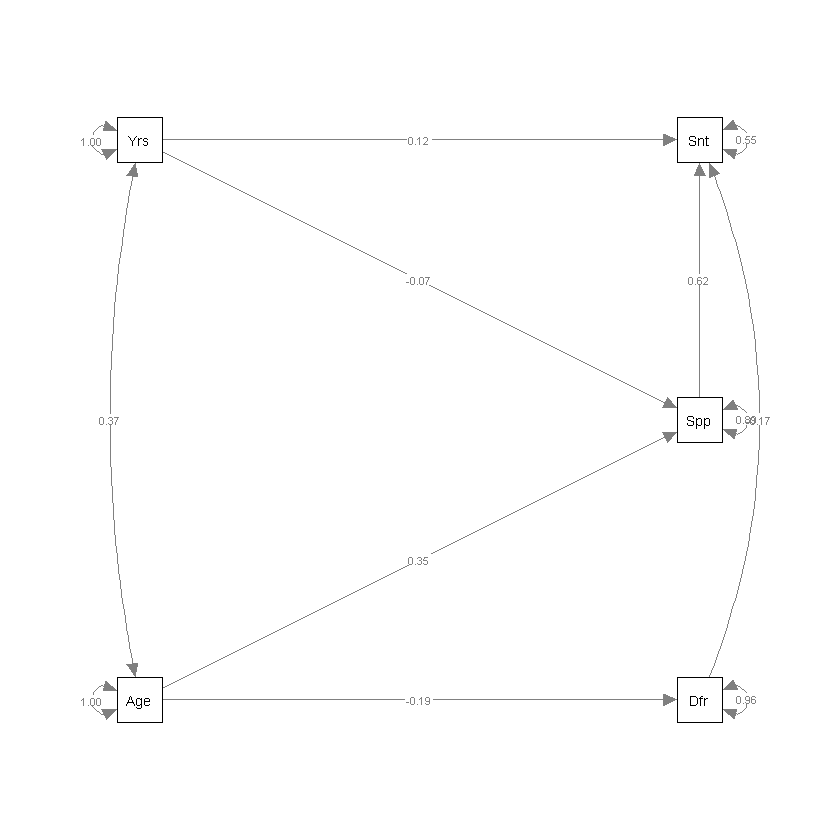

In [9]:
semPaths(Union.A.fit, whatLabels = "std", rotation = 2)

<br>

## 04.03. 적합도 평가
- **구조방정식의 일차적 목적 : 연구자가 가정한 모형이 데이터에 의해서 얼마나 지지되는가를 평가 (= 연구자의 모형에 의해서 추정된 공분산행렬이 관측된 공분산행렬과 얼마나 부합하는지를 평가)**
- 만약 적합도 (goodness of fit)이 좋지 않다면 모수에 대한 추가적인 해석은 의미가 없음

<br>

### 주요 적합도 통계량들에 대한 요약

- **절대 적합도 지수 (Absolute Fit Index)**

<table class="dataframe">
<caption></caption>
<thead>
	<tr><th scope=col>적합도 지수</th><th scope=col>범위</th><th scope=col>기준</th>
	<tr><th scope=col></th><th scope=col>&lt;범위&gt;</th><th scope=col></th>
</thead>
<tbody>
	<tr><td>$\chi^2 / df$(Normed Chi-squared)</td><td>0$\sim\infty$</td><td>$\leq$ 2 (또는 3)</td>
        <tr><td>GFI (Goodness of Fit Index)</td><td>0$\sim$1</td><td>$\geq0.9$</td>
            <tr><td>AGFI (Adjusted Goodness of Fit Index)</td><td>0$\sim$1</td><td>$\geq0.9$</td>
                <tr><td>RMSEA (Root Mean Square Error of Approximation)</td><td>0$\sim\infty$</td><td>$\leq$ 0.08 (또는 0.1)</td>
                    <tr><td>RMR (Root Mean square Residual)</td><td>0$\sim\infty$</td><td>작을수록 좋음</td>
                        <tr><td>SMRM (Standardized RMR)</td><td>0$\sim\infty$</td><td>$\leq$ 0.05 (또는 0.1)</td>
                            <tr><td>CN (Hoelter's Critical N)</td><td>0$\sim\infty$</td><td>$\geq$ 200</td>
</tbody>
</table>

- **증분 적합도 지수 (Incremental Fit Index)**

<table class="dataframe">
<caption></caption>
<thead>
	<tr><th scope=col>적합도 지수</th><th scope=col>범위</th><th scope=col>기준</th>
	<tr><th scope=col></th><th scope=col>&lt;범위&gt;</th><th scope=col></th>
</thead>
<tbody>
<tr><td>CFI (Comparative Fit Index)</td><td>0$\sim$1</td><td>$\geq$ 0.9</td>
   <tr><td>TLI (Tucker-Lewis Index, NNFI)</td><td>0$\sim$1</td><td>$\geq$ 0.9</td>
       <tr><td>NFI (Normed Fit Index)</td><td>0$\sim$1</td><td>$\geq$ 0.9</td>
</tbody>
</table>

- **간명 적합도 지수 (Parsimony Fit Index)**

<table class="dataframe">
<caption></caption>
<thead>
	<tr><th scope=col>적합도 지수</th><th scope=col>범위</th><th scope=col>기준</th>
	<tr><th scope=col></th><th scope=col>&lt;범위&gt;</th><th scope=col></th>
</thead>
<tbody>
<tr><td>PGFI (Parsimony Goodness of Fit Index)</td><td>0$\;\sim$1</td><td>클수록 좋음</td>
   <tr><td>PNFI (Parsimony Normed Fit Index)</td><td>0$\;\sim$1</td><td>클수록 좋음</td>
       <tr><td>PCFI (Parsimony Comparative Fit Index)</td><td>0$\;\sim$1</td><td>클수록 좋음</td>
</tbody>
</table>

- **정보기준에 근거한 적합도 지수 (Fit Index based Information Criterion)**
<table class="dataframe">
<caption></caption>
<thead>
	<tr><th scope=col>적합도 지수</th><th scope=col>범위</th><th scope=col>기준</th>
	<tr><th scope=col></th><th scope=col>&lt;범위&gt;</th><th scope=col></th>
</thead>
<tbody>
<tr><td>AIC, BCC, BIC, CAIC</td><td>0$\;\sim\infty$</td><td>작을수록 좋음</td>
   <tr><td>ECVI (Expected Cross-Validation Index)</td><td>0$\;\sim\infty$</td><td>작을수록 좋음</td>
</tbody>
</table>

- **간명 적합도 지수와 정보기준 적합도 지수는 두 개 이상의 경쟁모형에 대하여 적합도를 비교할 때 유용**

<br>

### 적합도 지수에 의한 모형평가
- GFI를 제외한 대부분의 적합도 지수들이 기준에 미달 $\rightarrow$ 모형 설정에 문제가 있음을 확인

In [10]:
tidy(fitMeasures(Union.A.fit)) %>%
    filter(names %in% c("chisq", "df", "gfi", "agfi", "cfi", "tli", "rmsea", "srmr"))

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<lvn.vctr>
chisq,24.5045262
df,3.0000000
cfi,0.8619822
tli,0.5859465
rmsea,0.2035548
srmr,0.1026775
gfi,0.9497794
agfi,0.7488968


<br>

### 적합도 지수에 대한 해석

<br>

#### $\chi^2$ 통계량
- $\chi^2$통계량은 적합도가 얼마나 좋지 않은지를 나타내는 부적합도의 지수
    - **즉, 이 값이 클수록 데이터에 대한 모형의 적합도가 나쁘다는 것을 의미**
- **$\chi^2$ 통계량은 설정된 모형이 타당하다는 귀무가설 ($H_0:\beta_1=\beta_2=\dots\beta_m=0$)을 검정하는데 사용**
    - 귀무가설의 내용이 너무 엄격하다는 것과 $\chi^2$통계량이 표본크기, 관찰변수들의 상관계수의 크기, 정규분포성에 대하여 민감하든 단점 존재

<br>
    
**$\rightarrow \chi^2$통계량을 이용한 검정은 구조방정식 모형의 평가에 많이 사용되지 않음**

- **대신, 표본크기에 대한 민감도를 낮추기 위해 $\chi^2$값을 자유도로 나눈 포준카이제곱(normed chi-square)을 사용**
    - **표준카이제곱이 2 혹은 3보다 작으면 좋다는 기준이 통용되고 있지만, 표준카이제곱 값이 얼마나 작아야 모형을 수용할 수 있는 지에 대한 명확한 지침 존재 X**
    - 표준카이제곱도 표본크기의 영향에서 완전히 자유로울 수 없음

<br>

**$\chi^2$ 통계량을 적합도 지수로 사용하는 데 문제가 있지만, 일반적으로 $\chi^2$값 과 자유도 (degree of freedom)를 사용하는 것이 바람직**
- **대부분의 적합도 지수들이 $\chi^2$값에 근거하여 산출되기 때문**

<br>

**대부분의 적합도 지수들은 관찰변수의 수가 많을 수록 나빠지는 경향 존재**
- **단순히 적합도만을 향상시키고자 한다면, 관찰변수의 수를 줄이면 되지만, 구조방정식 모형 분석의 목적은 연구자의 모형(가설, 이론)을 검증하기 위한 것이지 적합도를 높이는 것에 목적을 두지 않음**
- **대게, 가장 기본적인 적합도 지수인 $\chi^2$통계량과 함께, 절대 적합도 지수와 증분 적합도 중 1개 이상의 값으로 모형의 적합도 및 간명도 증명**

<br>

#### 적합도와 좋은 모형의 관계
- 적합도는 연구자의 모형(가설, 이론)이 데이터를 통해 나타난 실제의 현상을 얼마나 잘 재현하는지를 측정
- **하지만, '좋은 적합도'가 '좋은 모형'으로 이어지는 것은 아님**
    - 적합도가 높다는 것은 좋은 모형이기 위한 여러 가지 필요조건 중 하나 (필요충분조건이 아님)

<br>

#### 적합도와 설명력
- **적합도는 모형의 적절성을 나타내지만, 설명력은 어떤 내생변수와 설명변수들의 관계에 대한 강도를 나타냄**
    - 즉, 설명력은 '설명변수들이 내생변수의 변이를 설명하는 정도' ($=R^2$)

<br>

#### 결론
- **적합도 지수들은 연구결과가 이론적으로 의미가 있는지 아닌지에 대해서 말해주지 않음**
- **적합도가 높게 나타났다고 해서 반드시 내생변수의 설명력이 높게 나타나지 않음**
- **데이터가 일반적인 가정을 만족하지 않은 경우 (비정규성, 특이값의 존재, 다중공선성 등이 존재 시), 적합도가 높더라도 어떤 계수들이 값이 기대와 달리 매우 낮거나 부호가 예상과 반대로 나올 수 있음**

<br>

#### 포화모형 (Saturated Model)
- **포화모형 : 카이제곱 통계량의 자유도가 0이 되는 모형**
    - 고려하고 있는 관찰변수들로 만들 수 있는 가장 복잡한 모형 중 하나
    - 모통계적 모형구축의 목적이 데이터에 내재되어 있는 복잡한 구조를 단순화하여 설명하려는 것에 있다고 할 때, **모수의 절약이 시도되지 않은 모형 (간명성의 측면에서 가치가 없음)**
- 잠재변수가 있는 구조방정식모형의 경우에는 포화모형이 나타나지 않음

<br>

## 04.04. 수정지수를 이용한 모형
- 모형의 적합도가 좋지 않은 통상적인 이유는 모형이 너무 단순하여 구조를 제대로 나타내지 못하기 때문
    - 적합도가 낮은 경우 일차적으로 모형에 추가적인 모수를 도입하여 모형에 대한 제약을 완호시킬 필요가 있는지를 검토

<br>

### **수정지수 (modification index)** : **해당 모수를 모형에 추가할 경우 감소하는 카이제곱 값**
- **수정지수가 큰 모수를 추가하면 적합도 지수들이 좋아질 가능성이 증가**
- **어떤 두 변수의 인과(연관)관계에 높은 수정지수가 발견된다면, 두 변수 간에는 추정되지 않고 남아 있는 어떤 관계가 있다는 것을 암시**
- **일반적으로 수정지수가 4 이상의 값을 가질 때, 유의한 카이제곱 값의 감소를 가져옴**

<br>

#### 주의점
- **수정지수는 수치적인 방향을 제시해 주는 것에 불과, 어떤 모수를 모형에 추가할 것인지는 당연히 해당 분야의 이론이나 가설에 근거하여 결정**
- 어떤 모수를 추가하여 모형을 수정하는 경우, 다른 모수에 대한 추정과 검정에도 영향
    - 수정지수가 큰 것들이 여러개가 있다고해도 한번에 추가하면 안됨
- **동치모형(equivalent model) : 변수들 간에 설정된 경로는 다르지만, 동일한 예측공분산을 산출하는 모형**
    - (동치모형은 동일한 적합도와 자유도를 가지므로, 적합도만으로는 동치관계에 있는 모형들 중 어느 것이 더 우수한지 결정 할 수 없음)
    


In [17]:
Union.A

[1] "\n    # regression\n    Defer ~ Age\n    Suppo ~ Years + Age\n    Senti ~ Years + Defer + Suppo\n"

In [11]:
modificationindices(Union.A.fit, sort=T)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16,Defer,~,Suppo,21.6410285,-0.475637027,-0.475637027,-0.36701616,-0.367016158
13,Defer,~~,Suppo,20.8768031,-3.694434549,-3.694434549,-0.34738331,-0.347383307
19,Suppo,~,Defer,20.8768031,-0.257701189,-0.257701189,-0.33396957,-0.333969567
17,Defer,~,Senti,17.6088268,-0.392359408,-0.392359408,-0.52258932,-0.522589323
20,Suppo,~,Senti,5.3334856,0.328917029,0.328917029,0.56774496,0.567744965
22,Age,~,Defer,1.8515985,-0.919637887,-0.919637887,-0.26396025,-0.263960247
18,Defer,~,Years,1.8515985,0.417173335,0.417173335,0.10932247,0.108124271
26,Years,~,Defer,1.8515985,0.025655719,0.025655719,0.09790194,0.097901943
28,Years,~,Senti,1.1161157,-0.047911483,-0.047911483,-0.24351359,-0.243513587


<br>

- $Suppo \sim Defer$ $(Suppo \leftarrow Defer)$ : Suppo에 대한 인과관계에 Defer를 추가
- $Defer \sim Suppo$ $(Defer \leftarrow Suppo)$ : Defer에 대한 인과관계에 Suppo를 추가
- $Defer \sim\sim Suppo$ $(zeta_1 \leftrightarrow zeta_2)$ : Suppo에 대한 오차변수와, Defer에 대한 오차변수의 연관관계 (양방향 화살표 추가)

<br>

* 수정모형 1

$$
\begin{cases}
Defer\;=\;\rho_{12}Age + \;\zeta_1\\
Suppo\;=\;\rho_{21}Years + \rho_{22}Age + \beta_{21}Defer + \;\zeta_2\\
Senti\;=\;\rho_{31}Years + \beta_{31}Defer + \beta_{32}Suppo + \zeta_3\\
\end{cases}$$

In [18]:
Union.B <- '
    # regression
    Defer ~ Age
    Suppo ~ Years + Age + Defer
    Senti ~ Years + Defer + Suppo
'

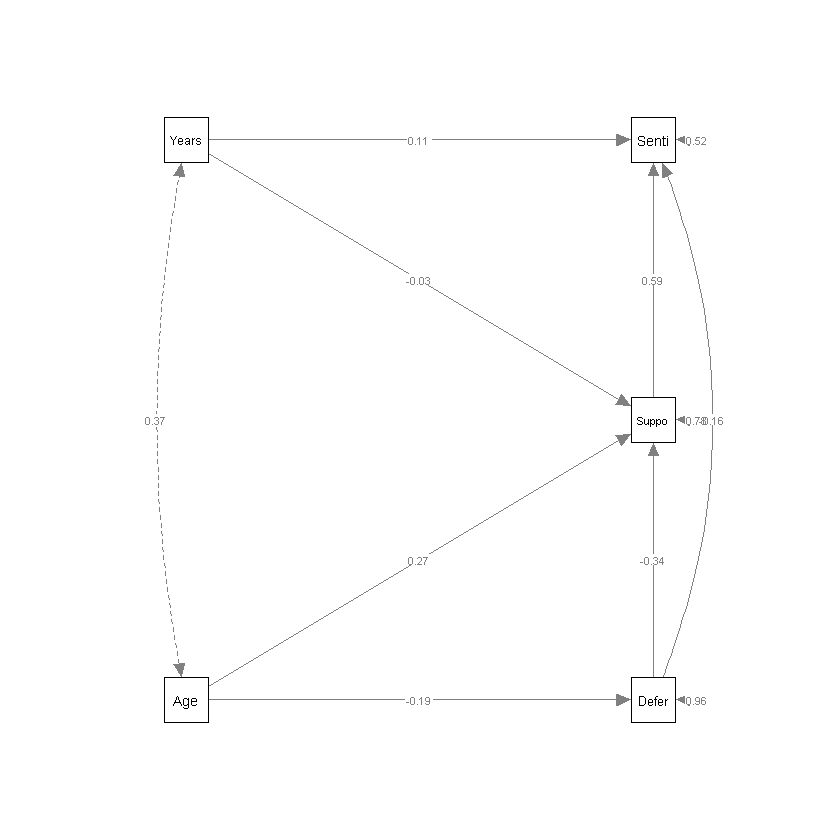

In [22]:
Union.B.fit <- sem(Union.B, data = Union, fixed.x=TRUE)
semPaths(Union.B.fit, whatLabels = "std", style = "lisrel", nCharNodes = 0, rotation = 2)

<br>

- 수정된 모형의 $\chi^2 = 2.000$. $df=2$로서, 표준카이제곱 값이 1이며, GFI, TLI, RMSEA 등 거의 모든 적합도 지수들이 매우 향상

In [41]:
tidy(fitMeasures(Union.A.fit)) %>%
                  filter(names %in% c("chisq", "df", "gfi", "agfi", "cfi", "tli", "rmsea", "srmr")) %>%
                  mutate(x = as.numeric(x)) %>%
                  rename(A = x) %>%
    left_join(tidy(fitMeasures(Union.B.fit)) %>%
                filter(names %in% c("chisq", "df", "gfi", "agfi", "cfi", "tli", "rmsea", "srmr")) %>%
                mutate(x = as.numeric(x)) %>%
                rename(B = x))

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"
Joining, by = "names"


names,A,B
<chr>,<dbl>,<dbl>
chisq,24.5045262,1.99952502
df,3.0000000,2.00000000
cfi,0.8619822,1.00000000
tli,0.5859465,1.00001372
rmsea,0.2035548,0.00000000
srmr,0.1026775,0.02775428
gfi,0.9497794,0.99244322
agfi,0.7488968,0.94332417


<br>

* 수정모형은 4보다 큰 수정지수를 가지는 추가경로는 없음

In [42]:
modificationindices(Union.B.fit, sort = TRUE)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,Defer,~,Suppo,1.851599e+00,-4.262294e+00,-4.262294e+00,-3.285436e+00,-3.285436e+00
19,Defer,~,Years,1.851599e+00,4.171733e-01,4.171733e-01,1.093225e-01,1.081243e-01
26,Years,~,Defer,1.716289e+00,2.378088e-02,2.378088e-02,9.074756e-02,9.074756e-02
22,Age,~,Defer,1.715518e+00,-8.520504e-01,-8.520504e-01,-2.445608e-01,-2.445608e-01
28,Years,~,Senti,1.528038e+00,-3.529295e-02,-3.529295e-02,-1.857331e-01,-1.857331e-01
27,Years,~,Suppo,1.286490e+00,-6.843119e-02,-6.843119e-02,-2.012847e-01,-2.012847e-01
23,Age,~,Suppo,1.195809e+00,2.280038e+00,2.280038e+00,5.044445e-01,5.044445e-01
18,Defer,~,Senti,1.189929e+00,3.884229e-01,3.884229e-01,5.356722e-01,5.356722e-01
24,Age,~,Senti,3.560453e-01,1.471588e-01,1.471588e-01,5.825083e-02,5.825083e-02


<br>

## 04.05. 개별 모수들에 대한 검정
- 적합도가 만족스러운 것으로 판정 시, 개별 모수에 대한 추론을 진행
- 수정모형의 회귀계수 

In [46]:
summary(Union.B.fit, fit.measures=TRUE, rsquare=TRUE, standardized=TRUE) %>% print

lavaan 0.6.16 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           173

Model Test User Model:
                                                      
  Test statistic                                 2.000
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.368

Model Test Baseline Model:

  Test statistic                               164.810
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -1365.977
  Loglikelihood unrestricted model (H1)      -1364

<br>

#### **회귀계수의 추정과 함께, 개별 회귀계수에 대한 검정 $H_0:\beta_{ij}=0$**
- $z-값$사용
- 붓스트랩

<br>

**회귀계수 (Regression Weight)**

| 내생변수 | 설명변수 | 추정치 | 표준화추정치 | p-값 | SMC$R^2$ |
| - | - | - | - | - | - |
| Defer | Age | -0.055 | -0.192 | 0.010 | 0.037 |
| |
| Suppo | Years | -0.098 | -0.033 | 0.646 | 0.217 |
|  | Age | 0.060 | -0.273 | < .001 |  |
|  | Defer | -0.260 | -0.338 | < .001 |  |
| |
| Senti | Years | 0.604 | 0.115 | 0.036 | 0.485 |
| | Defer | -0.227 | -0.164 | 0.006 | |
| | Suppo | 1.064 | 0.595 | < .001| |

<br>

### Z-값
$$z-값 = {{추정치(Estimate)}\over{표준오차(Standard\;Error)}}$$

- 표본크기가 충분히 크다는 조건하에서 z-값은 근사적으로 표준정규분포를 따름

    $\rightarrow$ '해당 모수가 0과 같다' 라는 가설에 대한 검정 수행
    
- 위의 표에서 $Suppo \sim Years$에 대응되는 회귀계수를 제외한 모든 계수가 통계적으로 유의

<br>

## 04.06 붓스트랩 방법

- 재표본(resampling)기법에 기초한 비모수적 방법 중 하나
    - **분포에 대한 가정이나 표본크기 문제에 큰 영향을 받지 않고 사용**
- **`sem()`의 `se`매개변수를 `"bootstrap"`으로 설정, `"bootstrap"`매개변수에 리샘플링 횟수 지정**
    - z-값을 이용한 방법의 표준오차 (p-값)과 붓스트랩 방법의 표준오차 (p-값)은 다르며, 두 결과 중 어느 것은 선택할지에 대해서는 데이터의 분포 및 표본크기 등을 종합적으로 고려하여 결정
    - **다만, z-값을 이용하는 방법이 통계량의 정규분포성과 큰 표본크기를 요구한다는 점을 고려할 때, 일반적으로는 붓스트랩 방법의 표준오차(p-값)이 더 선호될 수 있음**

In [47]:
Union.B.fit <- sem(Union.B.fit, data = Union, fixed.x = FALSE, 
                   se = "bootstrap", bootstrap = 1000)

In [52]:
print(summary(Union.B.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE))

lavaan 0.6.16 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           173

Model Test User Model:
                                                      
  Test statistic                                 2.000
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.368

Model Test Baseline Model:

  Test statistic                               164.810
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2295.558
  Loglikelihood unrestricted model (H1)      -2294

<br>

## 04.07. 간명한 모형 구축

In [62]:
Union.C <- '
    # regression
    Defer ~ Age
    Suppo ~ Age + Defer
    Senti ~ Years + Defer + Suppo
'

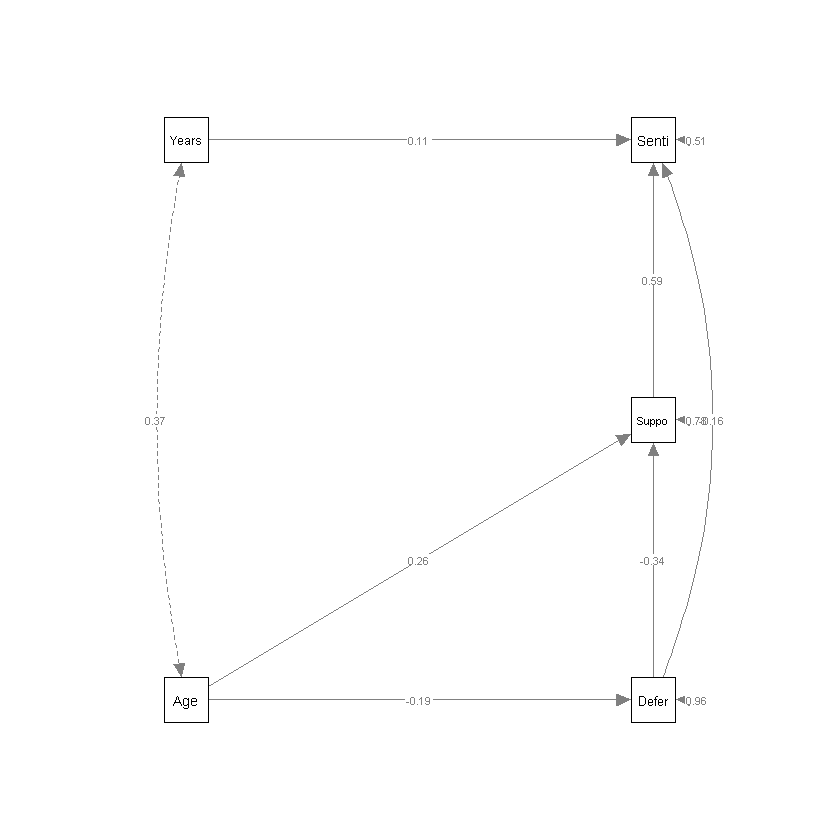

In [63]:
Union.C.fit <- sem(Union.C, data = Union, fixed.x=TRUE)
semPaths(Union.C.fit, whatLabels = "std", style = "lisrel", nCharNodes = 0, rotation = 2)

<br>

- 초기모형 (Union.A.fit)과 비교해서 모형의 적합도 지수가 향상

In [64]:
tidy(fitMeasures(Union.C.fit)) %>%
    filter(names %in% c("chisq", "df", "gfi", "agfi", "cfi", "tli", "rmsea", "srmr"))

Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"


names,x
<chr>,<lvn.vctr>
chisq,2.20807302
df,3.00000000
cfi,1.00000000
tli,1.01524796
rmsea,0.00000000
srmr,0.03250038
gfi,0.99166959
agfi,0.95834796


<br>

- 모든 수정지수가 4가 넘지 않음

In [65]:
modificationindices(Union.C.fit, sort = TRUE)

,lhs,op,rhs,mi,epc,sepc.lv,sepc.all,sepc.nox
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,Defer,~,Years,1.851599e+00,4.171733e-01,4.171733e-01,1.093225e-01,1.081243e-01
26,Years,~,Defer,1.711044e+00,2.370820e-02,2.370820e-02,9.047024e-02,9.047024e-02
22,Age,~,Defer,1.710296e+00,-8.494566e-01,-8.494566e-01,-2.438164e-01,-2.438164e-01
17,Defer,~,Senti,1.358895e+00,3.854314e-01,3.854314e-01,5.329490e-01,5.329490e-01
28,Years,~,Senti,1.147475e+00,-1.871604e-02,-1.871604e-02,-9.875514e-02,-9.875514e-02
27,Years,~,Suppo,6.551748e-01,-1.833570e-02,-1.833570e-02,-5.399011e-02,-5.399011e-02
23,Age,~,Suppo,6.544131e-01,6.564853e-01,6.564853e-01,1.453973e-01,1.453973e-01
24,Age,~,Senti,4.783798e-01,1.637161e-01,1.637161e-01,6.497580e-02,6.497580e-02
19,Suppo,~,Senti,2.967331e-01,-9.567011e-02,-9.567011e-02,-1.714373e-01,-1.714373e-01


<br>

- 모든 회귀계수가 통계적으로 유의

In [67]:
print(summary(Union.C.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE))

lavaan 0.6.16 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           173

Model Test User Model:
                                                      
  Test statistic                                 2.208
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.530

Model Test Baseline Model:

  Test statistic                               164.810
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.015

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -1366.081
  Loglikelihood unrestricted model (H1)      -1364

<br>

## 04.08. 내생 오차변수들 간의 연관성
- **오차변수는 모형에 포함되어 있는 인과관계로는 설명될 수 없으나, 내생변수의 변이를 발생시키는 원인으로 모형에 도입되는 일종의 외생변수**
- 모형구축의 과정에서 내생 (endogenous) 오차변수들 간에 연관성이 상정될 수 있으나, 이는 오차들간의 연관성이라는 단순한 의미를 갖는 것이 아니라 **관련된 설명변수들이 통제된 상황에서 내생변수들 간의 편상관(partial correlation)으로 해석되어야 함**

<br>

**회귀계수 (Regression Weight)**

| 내생변수 | 설명변수 | 추정치 | 표준화추정치 | p-값 | SMC $R^2$ | 
| - | - | - | - | - | - |
| Defer | Age | -0.055 | -0.192 | 0.005 | 0.037 |
| Suppo | Age | 0.072 | 0.325 | <.001 | 0.106 | 
| Senti | Years | 0.604 | 0.115 | 0.037 | 0.488 |
| | Defer | -0.227 | -0.164 | 0.006 | |
| | Suppo | 1.064 | 0.594 | <.001 | | 

<br>

**편상관 (Partial Correlation)**

| 내생변수 | 공분산 | 상관계수 | p-값 | 
| - | - | - | - |
| Defer, Suppo | -3.770 | -0.354 | <.001 |

<br>

**공분산 (Covariace)**

| 외생변수 | 공분산 | 상관계수 | p-값 |
| - | - | - | - |
| Years, Age | 5.041 | 0.371 | < .001 |

<br>

- **오차변수 $\zeta_1,\; \zeta_2$간의 상관계수 -0.354는 대응되는 내생변수 (Defer, Suppo) 간의 편상관 (연관성)으로 해석 될 수 있음**
- **앞의 Union.C.fit 모형과 비교하였을 때, 경로 '$Suppo\sim Age$'에 대한 추정치가 조금 다른 것을 제외하고는 나머지는 모두 동일 (내생변수 Suppo에 대한 SMC도 조금 변화)** 

    **$\rightarrow$ Union.C.fit과 동치모형 $\rightarrow$ 동일한 적합도와 자유도**
    
    **만약, Suppo, Age 사이의 인과관계가 존재하는 것이 이론적으로 타당하다면 Union.C.fit을 채택**
    
    **두 변수사이에 연관관계가 존재하는 것이 타당하다면 Union.D.fit을 선택**


lavaan 0.6.16 ended normally after 15 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           173

Model Test User Model:
                                                      
  Test statistic                                 2.208
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.530

Model Test Baseline Model:

  Test statistic                               164.810
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.015

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -1366.081
  Loglikelihood unrestricted model (H1)      -13

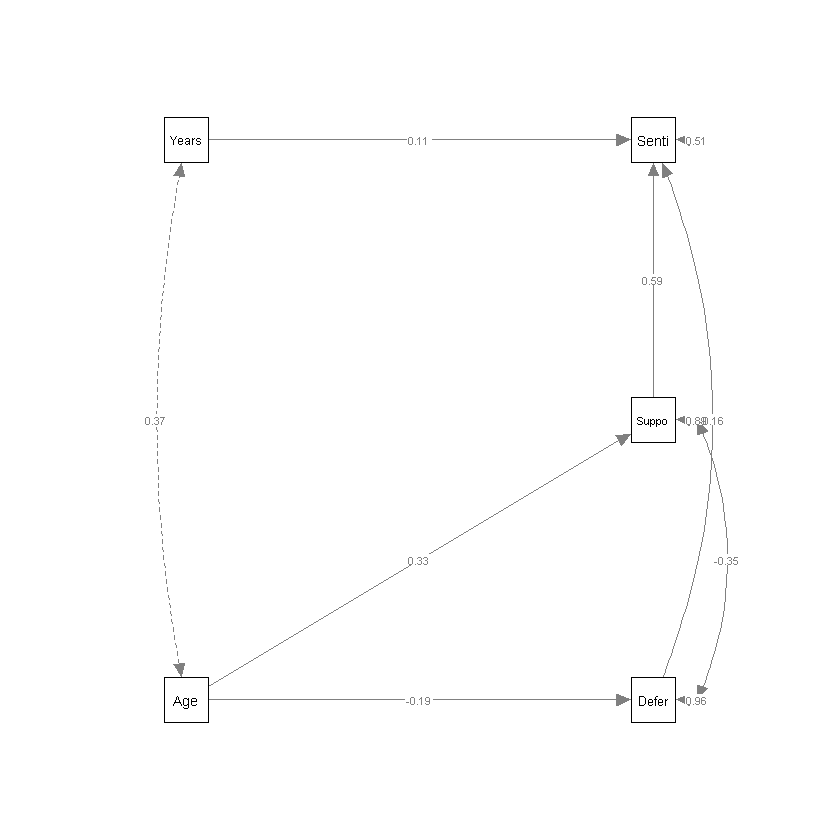

In [78]:
Union.D <- '
    # regression
    Defer ~ Age
    Suppo ~ Age 
    Senti ~ Years + Defer + Suppo

    # Error Covariance
    Defer ~~ Suppo
'
Union.D.fit <- sem(Union.D, data = Union, fixed.x=TRUE)
semPaths(Union.D.fit, whatLabels = "std", style = "lisrel", nCharNodes = 0, rotation = 2)
print(summary(Union.D.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE))

In [74]:
print(fitMeasures(Union.D.fit))

                 npar                  fmin                 chisq 
               10.000                 0.006                 2.208 
                   df                pvalue        baseline.chisq 
                2.000                 0.332               164.810 
          baseline.df       baseline.pvalue                   cfi 
                9.000                 0.000                 0.999 
                  tli                  nnfi                   rfi 
                0.994                 0.994                 0.940 
                  nfi                  pnfi                   ifi 
                0.987                 0.219                 0.999 
                  rni                  logl     unrestricted.logl 
                0.999             -1366.081             -1364.977 
                  aic                   bic                ntotal 
             2752.162              2783.695               173.000 
                 bic2                 rmsea        rmsea.ci.lo

<br>

## 04.09. 정규분포를 따르지 않는 데이터
- 구조방정식모형에 대한 계수들을 추정할 떄 가장 기본이 되는 추정방법은 **최대우도법 (maximum likelihood)**
    - 모든 관찰변수들이 정규분포를 따를 때 타당한 방법
    
        **관찰변수들 중 일부가 정규분포로부터 심하게 이탈되어 있는 경우에는 올바르지 않음**

In [79]:
Customer <- read.csv(paste0(getwd(), "/Data/Customer.csv"), header = TRUE)

In [82]:
Customer %>% glimpse

Rows: 900
Columns: 7
$ Group     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Expect    <dbl> 85.18519, 92.59259, 77.77778, 70.37037, 77.77778, 81.48148, …
$ Quality   <dbl> 88.88889, 96.29630, 77.77778, 70.37037, 77.77778, 85.18519, …
$ Value     <dbl> 88.88889, 94.44444, 83.33333, 66.66667, 83.33333, 77.77778, …
$ Satisfact <dbl> 96.29630, 100.00000, 70.37037, 70.37037, 81.48148, 77.77778,…
$ Complaint <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 0, 100, 0,…
$ Loyalty   <dbl> 77.77778, 44.44444, 77.77778, 44.44444, 66.66667, 77.77778, …


<br>

### 정규성 검토
- 데이터에 대한 기술통계량 및 정규성평가 결과

In [85]:
describe(Customer |> select(-c("Group", "Complaint")))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Expect,1,900,83.51440,13.07437,85.18519,84.69650,10.98222,14.814815,100,85.18519,-0.8877839,1.16083840,0.4358122
Quality,2,900,75.72428,16.08220,77.77778,77.28395,10.98222,0.000000,100,100.00000,-1.2531644,2.83477641,0.5360734
Value,3,900,71.72222,16.02042,72.22222,72.59259,16.47333,5.555556,100,94.44444,-0.5471307,0.08706885,0.5340140
Satisfact,4,900,72.27984,15.73812,74.07407,73.54424,13.72778,0.000000,100,100.00000,-0.9088180,1.36879745,0.5246040
Loyalty,5,900,62.39506,22.72628,66.66667,63.93519,16.47333,0.000000,100,100.00000,-0.6421383,0.37123980,0.7575425


<br>

### WLS (가중최소제곱, weighted least square) 법
- WLS (= ADF, asymptotically distribution-free)
- **관찰변수들에 대하여 특별한 분포를 가정하지 않는 비모수적 방법**
- **`sem()`의 `estimator`을 `"WLS"`로 설정**

In [86]:
Customer.A <- '
    # regression
    Quality ~ Expect
    Value ~ Expect + Quality
    Satisfact ~ Expect + Quality + Value
    Loyalty ~ Expect + Quality + Satisfact
'

In [87]:
Customer.A.fit <- sem(Customer.A, data= Customer, estimator = "WLS")

<br>

- 거의 모든 적합도 지수들이 좋음

                 npar                  fmin                 chisq 
               14.000                 0.001                 2.491 
                   df                pvalue        baseline.chisq 
                1.000                 0.114               323.764 
          baseline.df       baseline.pvalue                   cfi 
               10.000                 0.000                 0.995 
                  tli                  nnfi                   rfi 
                0.952                 0.952                 0.923 
                  nfi                  pnfi                   ifi 
                0.992                 0.099                 0.995 
                  rni                 rmsea        rmsea.ci.lower 
                0.995                 0.041                 0.000 
       rmsea.ci.upper        rmsea.ci.level          rmsea.pvalue 
                0.108                 0.900                 0.469 
       rmsea.close.h0 rmsea.notclose.pvalue     rmsea.notclose

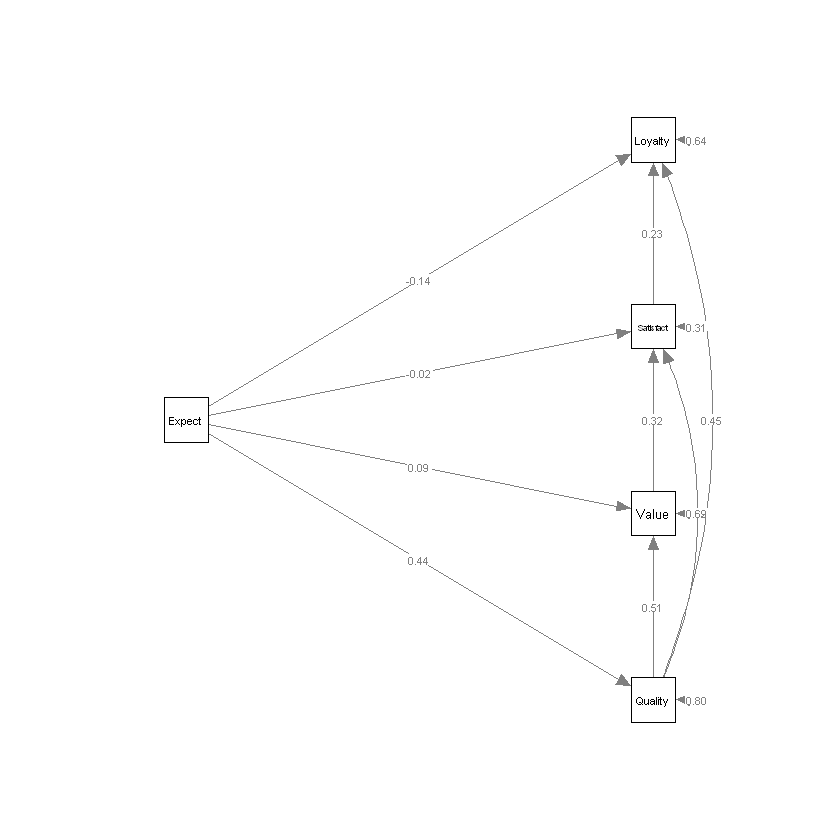

In [89]:
semPaths(Customer.A.fit, whatLabels = "std", style = "lisrel", nCharNodes = 0, rotation = 2)
print(fitMeasures(Customer.A.fit))

In [90]:
print(summary(Customer.A.fit, fit.measures = TRUE, rsquare = TRUE, standardized = TRUE))

lavaan 0.6.16 ended normally after 18 iterations

  Estimator                                        WLS
  Optimization method                           NLMINB
  Number of model parameters                        14

  Number of observations                           900

Model Test User Model:
                                                      
  Test statistic                                 2.491
  Degrees of freedom                                 1
  P-value (Chi-square)                           0.114

Model Test Baseline Model:

  Test statistic                               323.764
  Degrees of freedom                                10
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.995
  Tucker-Lewis Index (TLI)                       0.952

Root Mean Square Error of Approximation:

  RMSEA                                          0.041
  90 Percent confidence interval - lower       